In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
plt.rcParams.update({
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "axes.titlesize": 16
})

In [296]:
results30_percent = pd.read_csv(r"libRad30_monochr.csv")
results45_percent = pd.read_csv(r"libRad45_monochr.csv")
results60_percent = pd.read_csv(r"libRad60_monochr.csv")

results30 = pd.read_csv(r"libRad30_mono_diff.csv")
results45 = pd.read_csv(r"libRad45_mono_diff.csv")
results60 = pd.read_csv(r"libRad60_mono_diff.csv")

In [297]:
results = results60_percent      
magnitude = "AOD"
component = "DGR_dif"
#y_axis = "Irradiance difference [W/m2]"
y_axis="Relative percentage Irradiance difference"

df = results[results["variable"] == magnitude]

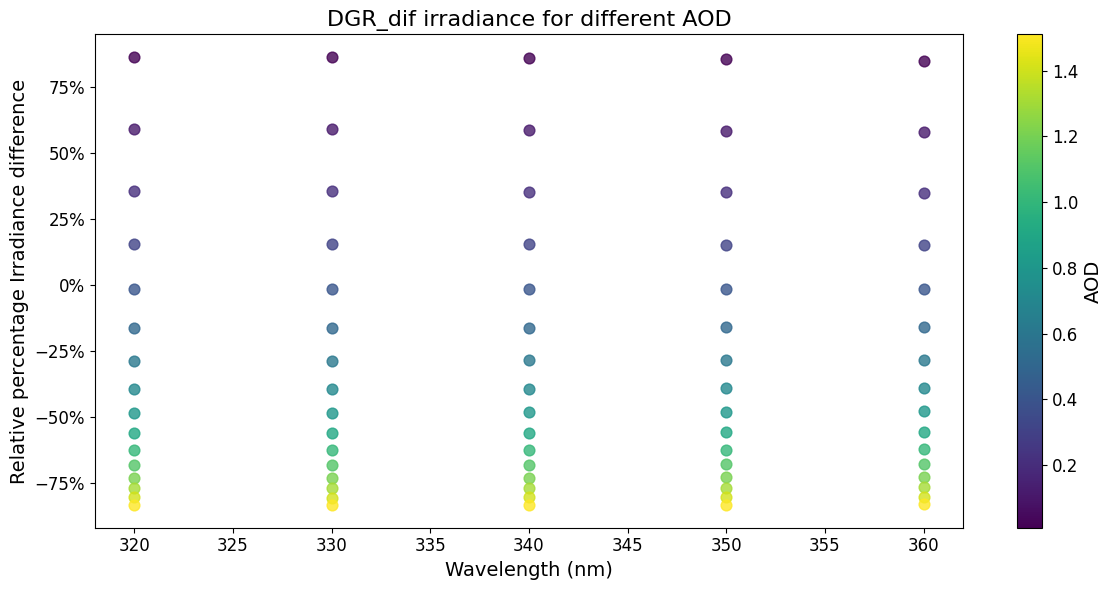

In [298]:
fig, ax = plt.subplots(figsize=(12, 6))

values = np.sort(df["value"].unique())
cmap = plt.cm.viridis
norm = plt.Normalize(values.min(), values.max())

for val in values:
    sub = df[df["value"] == val]

    ax.scatter(
        sub["WL"],
        sub[component],
        color=cmap(norm(val)),
        s=60,
        alpha=0.8
    )

ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel(y_axis)
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=100))
ax.set_title(f"{component} irradiance for different {magnitude}")

# Properly attach colorbar to this Axes
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax)
cbar.set_label(magnitude)

plt.tight_layout()